In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import skimage.io 
import tensorflow
import glob

from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.4,
                                   rotation_range = 10,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split =0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [3]:
train_dataset = train_datagen.flow_from_directory(directory = 'D:/SIMTESTLAB/Elephant Detection/dataset/train',
                                                  target_size = (224, 224),
                                                  class_mode = 'binary',
                                                  batch_size = 128)

Found 11712 images belonging to 2 classes.


In [4]:
valid_dataset  = valid_datagen.flow_from_directory(directory = 'D:/SIMTESTLAB/Elephant Detection/dataset/validation',
                                                  target_size = (224, 224),
                                                  class_mode = 'binary',
                                                  batch_size = 128)

Found 5808 images belonging to 2 classes.


In [5]:
test_dataset = test_datagen.flow_from_directory(directory = 'D:/SIMTESTLAB/Elephant Detection/dataset/test',
                                                target_size = (224, 224),
                                                class_mode = 'binary',
                                                batch_size = 128)

Found 5506 images belonging to 2 classes.


In [6]:
base_model = VGG16(input_shape = (224, 224, 3),
                   include_top = False,
                   weights = 'imagenet')

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
model = Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25088)          │       100,352 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,272,385 (81.15 MB)

 Trainable params: 6,506,753 (24.82 MB)

 Non-trainable params: 14,765,632 (56.33 MB)

In [11]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = 'binary_crossentropy', 
              metrics = [tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer = opt)

In [12]:
earlystopping = EarlyStopping(monitor = 'val_auc',
                              mode = 'max',
                              patience = 5,
                              verbose = 1)

checkpoint = ModelCheckpoint('best_model.keras',
                             monitor = 'val_auc',
                             mode = 'max',
                             save_best_only = True,
                             verbose = 1)

callback_list = [earlystopping, checkpoint]

In [13]:
model_history = model.fit(train_dataset, 
                          validation_data = valid_dataset,
                          epochs = 10,
                          callbacks = callback_list,
                          verbose = 1)

c:\Users\ajay2\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 8/92 ━━━━━━━━━━━━━━━━━━━━ 37:32 27s/step - auc: 0.7824 - loss: 0.5574

c:\Users\ajay2\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - auc: 0.9156 - loss: 0.3549 

c:\Users\ajay2\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))



Epoch 1: val_auc improved from -inf to 0.90101, saving model to best_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 3523s 38s/step - auc: 0.9159 - loss: 0.3543 - val_auc: 0.9010 - val_loss: 0.4498
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - auc: 0.9718 - loss: 0.2134 
Epoch 2: val_auc did not improve from 0.90101
92/92 ━━━━━━━━━━━━━━━━━━━━ 3395s 37s/step - auc: 0.9718 - loss: 0.2133 - val_auc: 0.8898 - val_loss: 0.4632
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - auc: 0.9768 - loss: 0.1931 
Epoch 3: val_auc improved from 0.90101 to 0.91457, saving model to best_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 3386s 37s/step - auc: 0.9768 - loss: 0.1930 - val_auc: 0.9146 - val_loss: 0.4345
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - auc: 0.9815 - loss: 0.1721 
Epoch 4: val_auc improved from 0.91457 to 0.92402, saving model to best_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 3396s 37s/step - auc: 0.9815 - loss: 0.1721 - val_auc: 0.9240 - val_loss: 0.4859
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Results:\n"
      f"Accuracy: {test_acc*100:.2f}%\n")

29/44 ━━━━━━━━━━━━━━━━━━━━ 10:08 41s/step - auc: 0.9745 - loss: 0.2382

c:\Users\ajay2\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


44/44 ━━━━━━━━━━━━━━━━━━━━ 1604s 36s/step - auc: 0.9743 - loss: 0.2408
Test Results:
Accuracy: 97.45%



In [17]:
# Save model
model.save('elephant_classifier.h5')

In [18]:
train_dataset.class_indices

{'elephant': 0, 'no_elephant': 1}

 20%|██        | 1/5 [00:11<00:45, 11.42s/it]c:\Users\ajay2\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 5/5 [00:38<00:00,  7.77s/it]


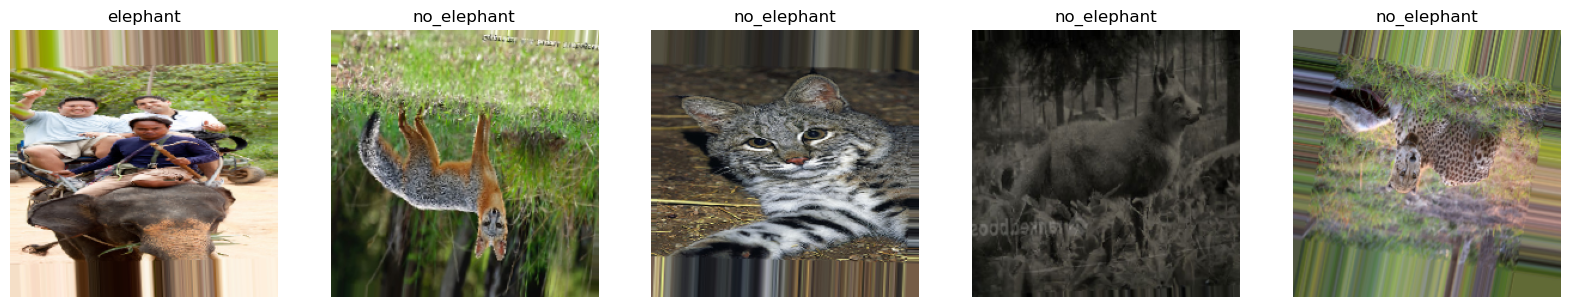

In [20]:
import tqdm
from tqdm import tqdm

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(5)):
    rand1 = np.random.randint(len(train_dataset))
    rand2 = np.random.randint(128)
    ax[i].imshow(train_dataset[rand1][0][rand2])
    ax[i].axis('off')
    label = train_dataset[rand1][1][rand2]
    if label == 1:
        ax[i].set_title('no_elephant')
    else:
        ax[i].set_title('elephant')